**Importando arquivo JFF para o Grafo**

In [1]:
h= ["157.76"]

Total de Vértices: 17
 > Lista de Vértices: ['Canindé', 'Poço Redondo', 'Porto da Folha', 'Feira Nova', 'Propriá', 'Capela', 'Brejo Grande', 'Aracaju', 'Estância', 'Itabaianinha', 'Lagarto', 'Itabaiana', 'Carira', 'Simão Dias', 'Poço Verde', 'Tobias Barreto', 'Cristinápolis']
Número de Posições x: 17
Número de Posições y: 17
[array([343., 127.]), array([418., 274.]), array([719., 278.]), array([755., 542.]), array([1042.,  425.]), array([1029.,  690.]), array([1377.,  399.]), array([932., 908.]), array([ 727., 1153.]), array([ 385., 1142.]), array([508., 936.]), array([696., 769.]), array([465., 573.]), array([311., 777.]), array([ 55., 786.]), array([ 130., 1050.]), array([ 509., 1340.])]

Total de de Transições: 56
 > Lista de Transições:  [[ 0  1]
 [ 1  3]
 [ 1  0]
 [ 1  2]
 [ 2  1]
 [ 2  4]
 [ 2  3]
 [ 3  1]
 [ 3  5]
 [ 3  4]
 [ 3 11]
 [ 3  2]
 [ 4  3]
 [ 4  2]
 [ 4  6]
 [ 4  5]
 [ 5  6]
 [ 5  3]
 [ 5  7]
 [ 5  4]
 [ 6  5]
 [ 6  4]
 [ 7  5]
 [ 7 11]
 [ 7 10]
 [ 7  8]
 [ 8 16]
 [ 8 

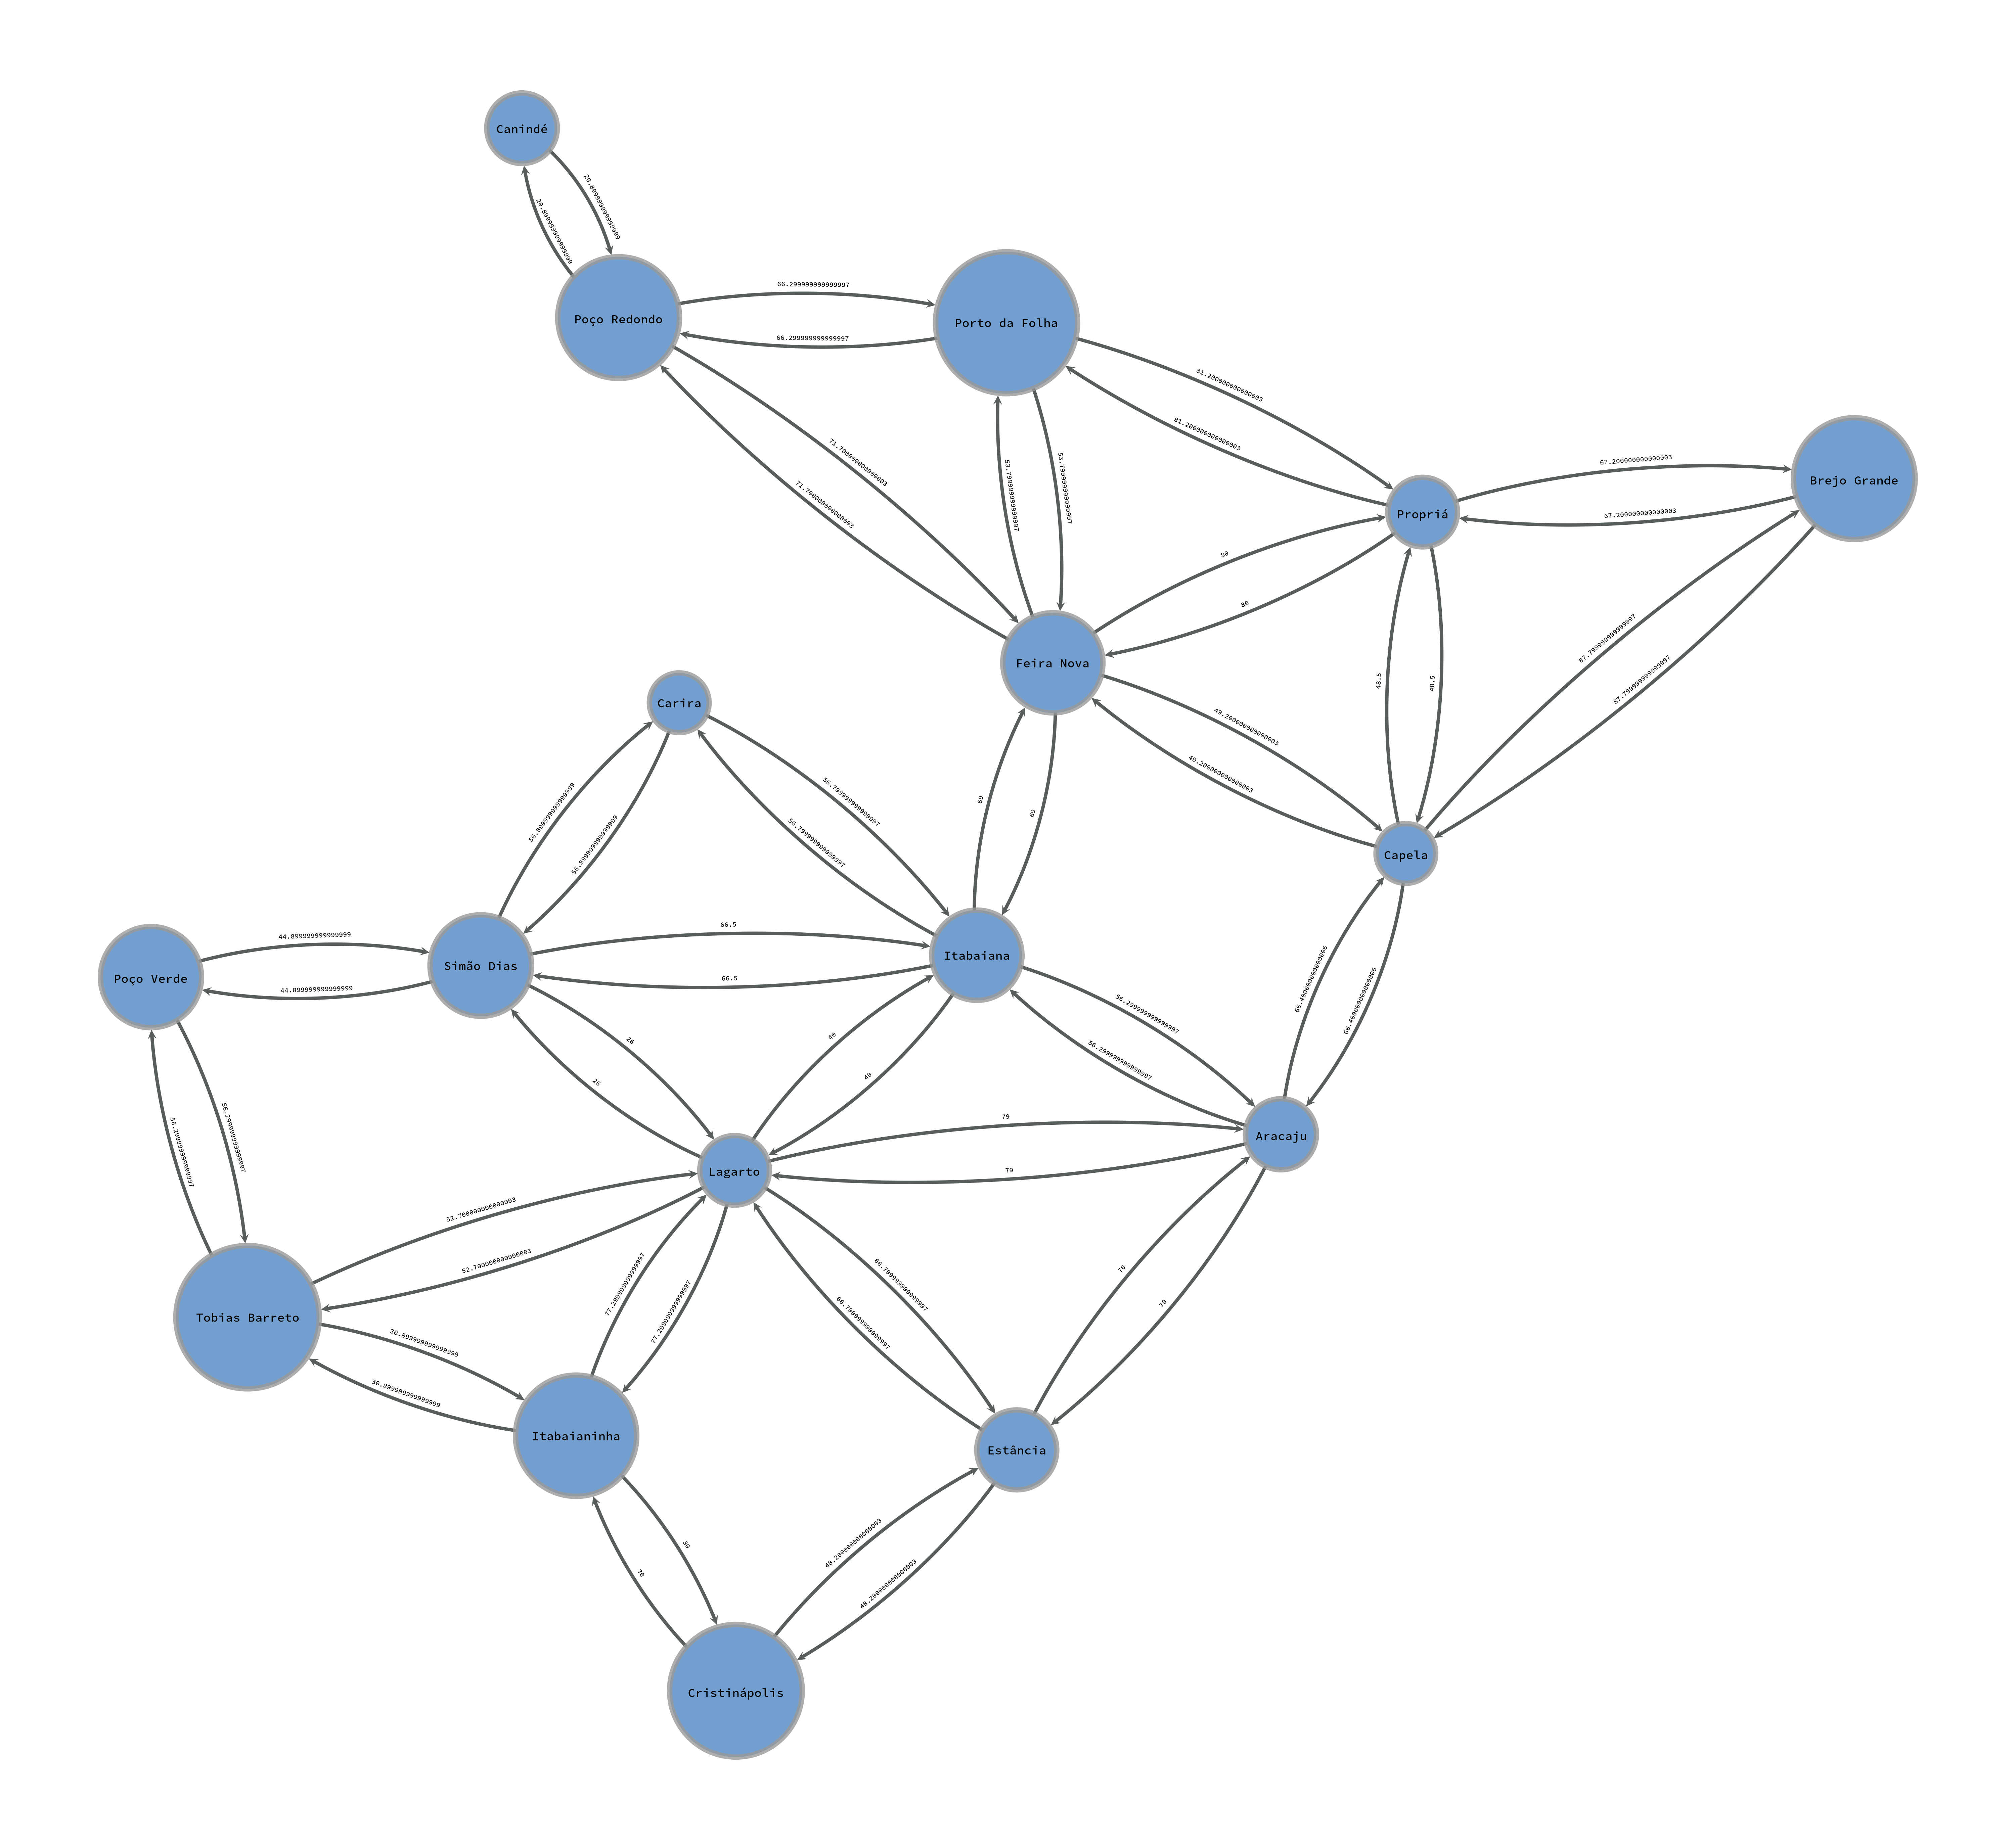

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4cec329ae0, at 0x7f4caf91e710>

In [2]:
import graph_tool.all as gt                       # Biblioteca para GRAFO 
from xml.dom import minidom

g = gt.Graph() 
g.set_directed(True)                              # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string
v_weight = g.new_vertex_property("float")          # referenciação da lista e_weight com uma nova propriedade criada para a função h(n) - tipo float
e_action = g.new_edge_property("string")          # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string
e_weight = g.new_edge_property("float")           # referenciação da lista e_weight com uma nova propriedade criada para a função g(n) - tipo float
v_pos  = g.new_vertex_property("vector<double>")

#Criação dos vértices no grafo à partir do arquivo .jff do jFlap
xmldoc = minidom.parse("2022.1 - IA - Grafo.jff")         #Carregando arquivo do JFLAP
itemlist = xmldoc.getElementsByTagName('state')                # Tag <state>  
n_Vertex = len(itemlist)                              
print('Total de Vértices:', len(itemlist))                    # Total de Estados
for s in itemlist:
    v = g.add_vertex()
    v_name[v] = s.attributes['name'].value

# Lista de vértices criados
print(" > Lista de Vértices:", list(v_name))

#Criação da posição dos vértices no grafo à partir do arquivo .jff do jFlap
vposX = []                                                   
itemlist = xmldoc.getElementsByTagName('x')                 # Tag <x>
print('Número de Posições x:', len(itemlist))
for s in itemlist:
   vposX.append(s.childNodes[0].nodeValue)

vposY = []                                                   
itemlist = xmldoc.getElementsByTagName('y')                 # Tag <y>
print('Número de Posições y:', len(itemlist))
for s in itemlist:
   vposY.append(s.childNodes[0].nodeValue)

for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
print(list(v_pos))

#Criação das arestas no grafo à partir do arquivo .jff do jFlap
e_from = []                                                   
itemlist = xmldoc.getElementsByTagName('from')                 # Tag <from>
n_Transition = len(itemlist)
print('\nTotal de de Transições:', len(itemlist))
for s in itemlist:
   e_from.append(s.childNodes[0].nodeValue)
e_to = []
itemlist = xmldoc.getElementsByTagName('to')                   # Tag <to>
for s in itemlist:
   e_to.append(s.childNodes[0].nodeValue)
e_read = []
itemlist = xmldoc.getElementsByTagName('read')                 # Tag <read>
for s in itemlist:
   e_read.append(s.childNodes[0].nodeValue)

for edge in range(n_Transition):
     e = g.add_edge(int(e_from[edge]), int(e_to[edge]))
     #e_action[e] = actions[int(e_read[edge])]
     e_action[e] = str(e_read[edge])
     e_weight[e] = float(e_read[edge])
# Lista de arestas criadas
print(" > Lista de Transições: ",g.get_edges())
# Lista de Pesos das arestas criadas
print(" > Lista de pesos g(n): ", list(e_weight))

#Carrendo função h dos vértices no grafo à partir do arquivo .jff do jFlap
xmldoc = minidom.parse("2022.1 - IA - Grafo.jff")         #Carregando arquivo do JFLAP
#Leitura da tag Label à partir do arquivo .jff do jFlap
e_h = []
itemlist = xmldoc.getElementsByTagName('label')                # Tag <label>
for s in itemlist:
   e_h.append(s.childNodes[0].nodeValue)
for v in g.vertices():
   v_weight[v] = float(e_h[int(v)])

# Lista de Pesos dos vértices criados
print(" > Lista de pesos h(n): ", list(v_weight))

#Desenhando o grafo
gt.graph_draw(g, pos = v_pos,#pos=gt.arf_layout(visual_G),
               bg_color = "white",
               vertex_text= v_name,
               #edge_text= e_action,
               edge_text= e_weight,
               edge_pen_width = 5,              
               vertex_font_size=18,
               edge_font_size = 10,
               #vertex_shape="double_circle",
               vertex_fill_color="#729fcf",
               vertex_size = 80,
               output_size=(3000, 3000))
               #output="2022.1 - IA - Grafo.png")

**Busca A Estrela - Ordem de Expansão dos Nodos**

In [3]:
def h(v):
    return v_weight[v]

Número de Vértices: 17
['Canindé', 'Poço Redondo', 'Porto da Folha', 'Feira Nova', 'Propriá', 'Capela', 'Brejo Grande', 'Aracaju', 'Estância', 'Itabaianinha', 'Lagarto', 'Itabaiana', 'Carira', 'Simão Dias', 'Poço Verde', 'Tobias Barreto', 'Cristinápolis']
[20.9, 71.7, 20.9, 66.3, 66.3, 81.2, 53.8, 71.7, 49.2, 80.0, 69.0, 53.8, 80.0, 81.2, 67.2, 48.5, 87.8, 49.2, 66.4, 48.5, 87.8, 67.2, 66.4, 56.3, 79.0, 70.0, 48.2, 70.0, 66.8, 77.3, 30.9, 30.0, 52.7, 77.3, 26.0, 79.0, 66.8, 40.0, 66.5, 56.3, 69.0, 56.8, 40.0, 56.8, 56.9, 44.9, 66.5, 26.0, 56.9, 44.9, 56.3, 56.3, 52.7, 30.9, 48.2, 30.0]
[125.89, 115.9, 132.45, 105.04, 157.76, 125.4, 188.7, 126.02, 102.55, 76.17, 59.17, 81.7, 65.82, 41.48, 0.0, 54.71, 97.07]
Propriá -> Feira Nova
Propriá -> Porto da Folha
Propriá -> Brejo Grande
Propriá -> Capela
Capela -> Aracaju
Feira Nova -> Poço Redondo
Feira Nova -> Itabaiana
Porto da Folha -> Poço Redondo
Itabaiana -> Simão Dias
Itabaiana -> Carira
Itabaiana -> Lagarto
Aracaju -> Estância
Lagarto -

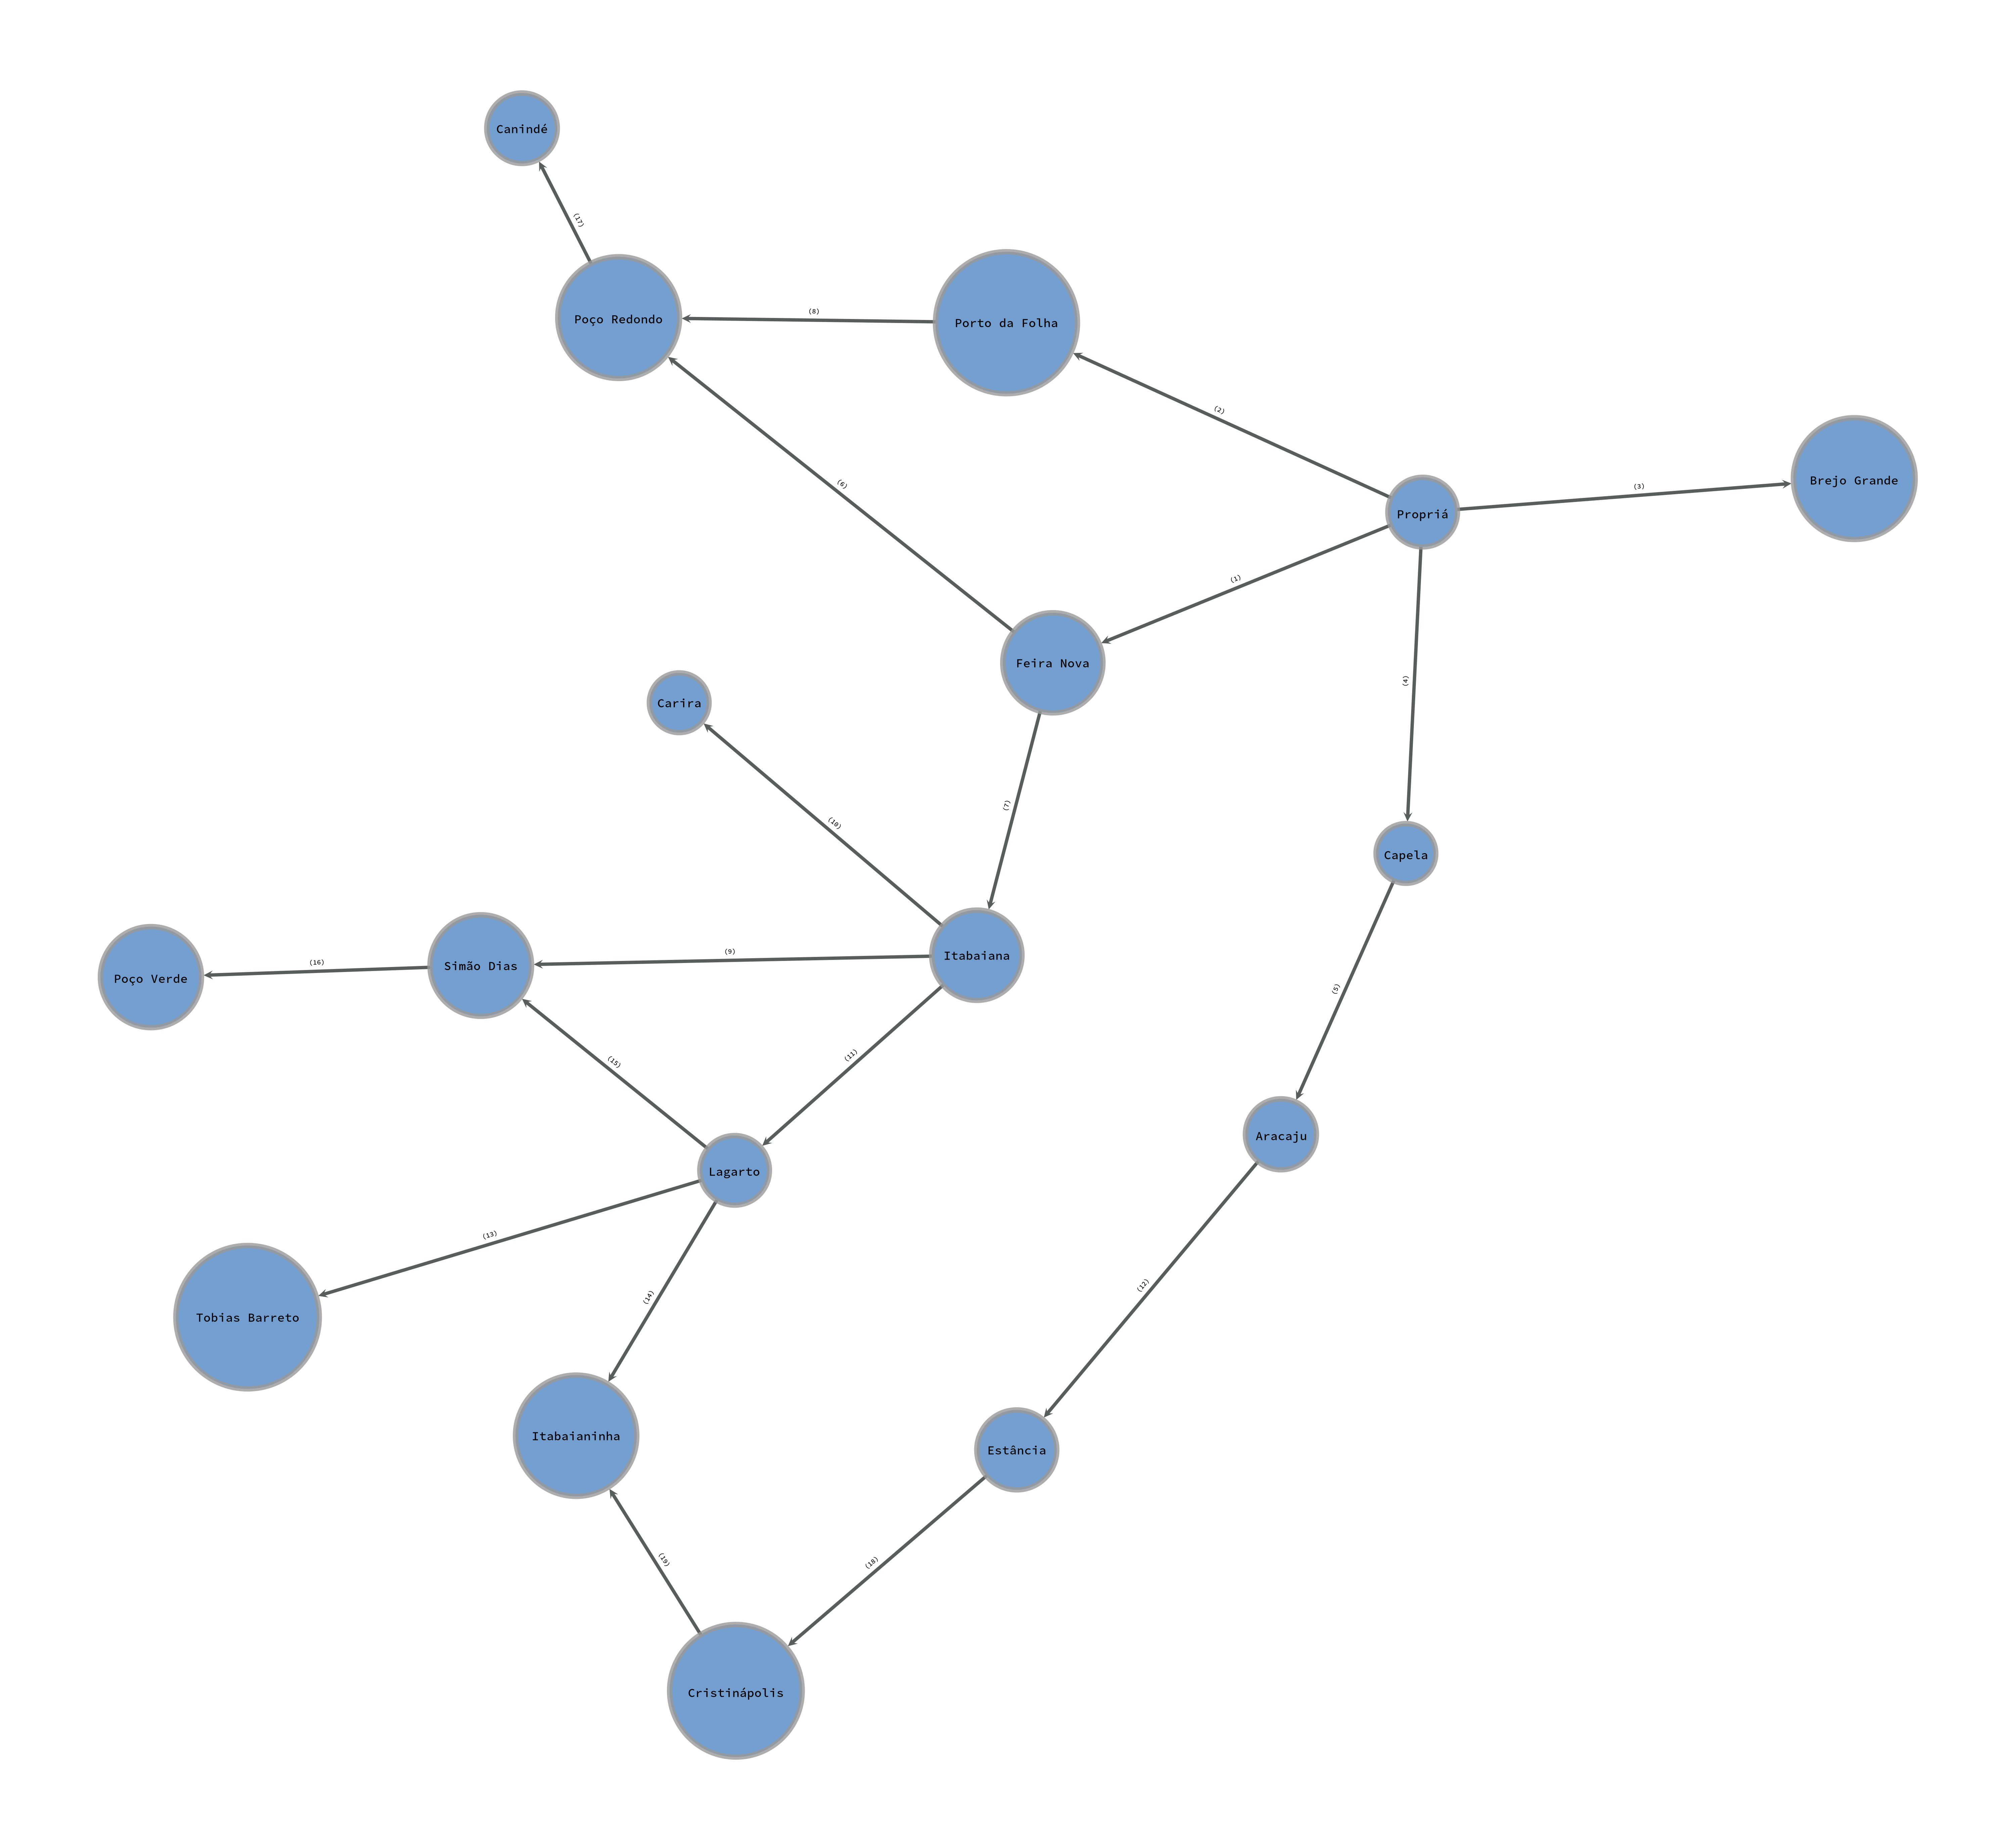

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4cec32a620, at 0x7f4cec319b40>

In [4]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_bfs = gt.Graph()                                    # criação do objeto para busca do Custo Uniforme (Dijkstra)
v_name_bfs = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_bfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int
e_action_bfs = g_bfs.new_edge_property("string")      # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string

#Criação dos vértices no grafo à partir do arquivo .jff do jFlap
xmldoc = minidom.parse("2022.1 - IA - Grafo.jff")         #Carregando arquivo do JFLAP
itemlist = xmldoc.getElementsByTagName('state')                # Tag <state>  
n_Vertex = len(itemlist)                              
print('Número de Vértices:', len(itemlist))                    # Total de Estados
for s in itemlist:
    v = g_bfs.add_vertex()
    v_name_bfs[v] = s.attributes['name'].value
# Lista de vértices criados
print(list(v_name))

#Busca em Largura (dfs) e geração das arestas
raiz = 'Propriá'
index_raiz = list(v_name).index(raiz)
ord = 1
print(list(e_weight))
print(list(v_weight))

for edge in gt.astar_iterator(g, g.vertex(index_raiz), e_weight, heuristic=lambda v: h(v)):
   print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_bfs.add_edge(int(edge.source()), int(edge.target()))
   e_ord[e] = ord
   e_action_bfs[e] = '(' + str(ord) + ') ' #+ e_action[g.edge(int(edge.source()), int(edge.target()))] 
   ord += 1

#Desenhando o grafo
gt.graph_draw(g_bfs, pos = v_pos,
               bg_color = "white",
               vertex_text= v_name_bfs,
               edge_text= e_action_bfs,
               edge_pen_width = 5,              
               vertex_font_size=18,
               edge_font_size = 10,
               #vertex_shape="double_circle",
               vertex_fill_color = "#729fcf",
               #fit_view = True,
               vertex_size = 80,
               output_size=(3000, 3000))
               #output="2022.1 - IA - Árvore de Busca Gulosa - Ordem de Expansão dos Nodos.png")                        


**Busca A Estrela - Busca e Apresentação do Caminho**

In [5]:
class VisitorExample(gt.AStarVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord, target): 
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        self.target = target
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print("   ",self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def examine_edge(self, e):                                                  # Invocado em cada aresta de cada vértice depois de descoberto.
        print("    Aresta (%s, %s) em análise..." % \
              (v_name[e.source()], v_name[e.target()]))

    def edge_relaxed(self, e):                                                  #Após o exame do vértices, este método é invocado. 
        self.pred[e.target()] = int(e.source())                                 
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_bfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count
        print("    Após análise, aresta (%s, %s) mantida." % \
            (v_name[e.source()], v_name[e.target()]))
       
    def finish_vertex(self, u):
        print("    > Todos os vértices adjacentes à", self.name[u], "foram descobertos!\n") 


------------------------------------------------
> Busca A Estrela - Caminhamento pelos Estados
------------------------------------------------

--> Canindé foi encontrado e entrou na FILA
    Canindé saiu da FILA e está sendo analisado (expandido)...
    Aresta (Canindé, Poço Redondo) em análise...
    Após análise, aresta (Canindé, Poço Redondo) mantida.
--> Poço Redondo foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à Canindé foram descobertos!

    Poço Redondo saiu da FILA e está sendo analisado (expandido)...
    Aresta (Poço Redondo, Feira Nova) em análise...
    Após análise, aresta (Poço Redondo, Feira Nova) mantida.
--> Feira Nova foi encontrado e entrou na FILA
    Aresta (Poço Redondo, Canindé) em análise...
    Aresta (Poço Redondo, Porto da Folha) em análise...
    Após análise, aresta (Poço Redondo, Porto da Folha) mantida.
--> Porto da Folha foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à Poço Redondo foram descobertos!

    Fei

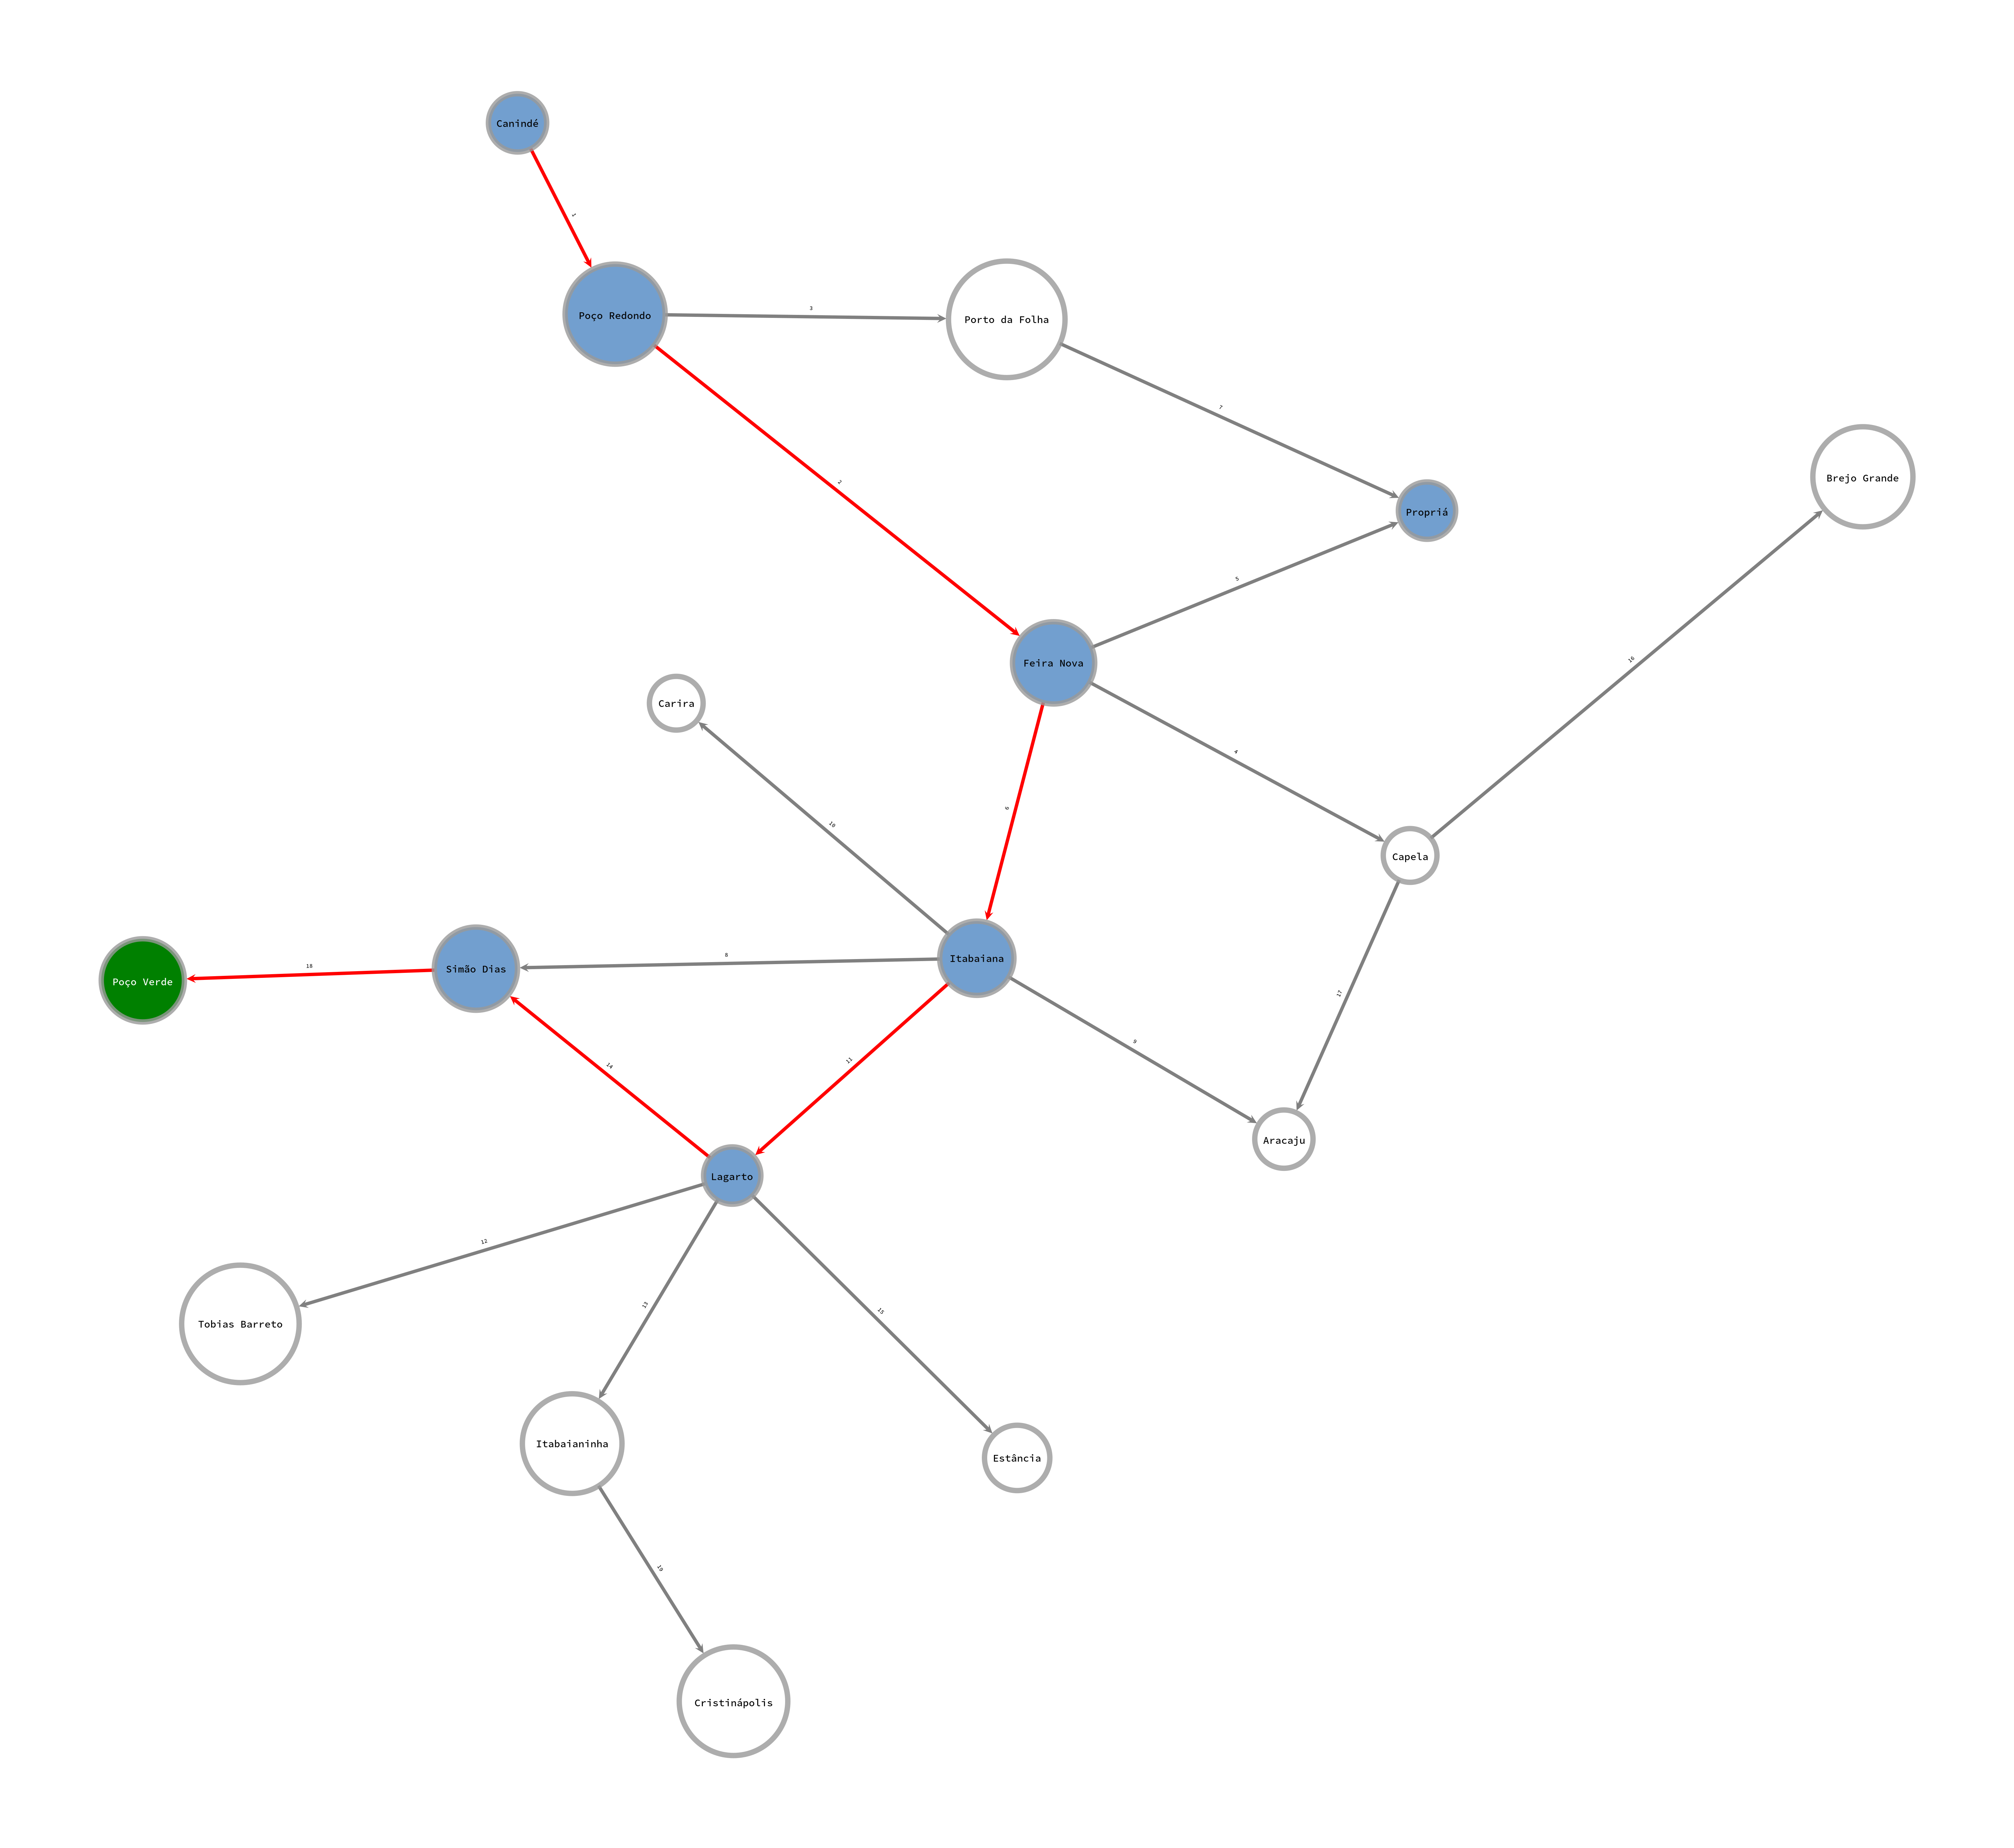

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4cec2e30d0, at 0x7f4cec31a0b0>

In [6]:
#Busca A Estrela e geração das arestas
g_bfs = gt.Graph()                                      # criação do objeto para busca A Estrela
bfsv_name       = g_bfs.new_vertex_property("string")      # referenciação da lista v_name_bfs com uma nova propriedade do vértice para o nome - tipo string 
bfsv_time       = g_bfs.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
bfsv_name_time  = g_bfs.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
bfsv_color      = g_bfs.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
bfsv_dist       = g_bfs.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
bfsv_pred       = g_bfs.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
bfse_color      = g_bfs.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
bfse_action     = g_bfs.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_ord        = g_bfs.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_weight_bfs = g_bfs.new_edge_property("float")       # referenciação da lista e_weight com uma nova propriedade criada para a função g(n) - tipo float


print("------------------------------------------------")
print("> Busca A Estrela - Caminhamento pelos Estados")
print("------------------------------------------------\n")
raiz = 'Propriá'
alvo = 'Poço Verde'
index_raiz = list(v_name).index(raiz)
index_alvo = list(v_name).index(alvo)

#dist, pred = gt.astar_search(g, g.vertex(0),          e_weight, VisitorExample(touch_v, touch_e, target), heuristic=lambda v: h(v))
gt.astar_search(g, g.vertex(0), e_weight, VisitorExample(bfsv_name, bfsv_time, bfsv_name_time, bfsv_color, bfsv_dist, bfsv_pred, bfse_color, bfse_action, bfse_ord, g.vertex(list(v_name).index(alvo))), heuristic=lambda v: h(v))
print("\n> Informações relevantes:")
print("-------------------------\n")
print("Espaço de Estados......:", list(bfsv_name))
print("Ordem de Expansão......:", list(bfsv_time))
print("Estados e Ordem de Exp.:", list(bfsv_name_time))
print("Cores Vértices.........:", list(bfsv_color))
print("Distância da raiz......:", list(bfsv_dist))
print("Precedessores..........:", list(bfsv_pred))
print("Cores Arestas..........:", list(bfse_color))
print("Ações das Arestas......:", list(bfse_action))
print("Arestas e Ordem de Exp.:", list(bfse_ord))

print("\n> Procura de um Estado e Caminho:")
print("---------------------------------\n")

index_alvo = list(bfsv_name).index(alvo)                     # Localizando o índice do Estado a ser encontrado
bfsv_color[index_raiz] = "#729fcf"
bfsv_color[index_alvo] = "green"
path = []                                                    # array do caminho
path.insert(0,bfsv_name[index_alvo])                         # inserções sendo realizadas no início

while index_alvo != index_raiz:
  e = g_bfs.edge(bfsv_pred[index_alvo], index_alvo)
  if e is None:
    break
  bfse_color[e] = "red"
  index_alvo = bfsv_pred[index_alvo]
  path.insert(0,bfsv_name[index_alvo])
  bfsv_color[index_alvo] = "#729fcf"
  
bfsv_color[index_raiz] = "#729fcf"; print("Cores Vértices.........:", list(bfsv_color))

print("Caminho encontrado.....:",path)                   # mostrando o caminho encontrado da raiz ao alvo


#Desenhando o grafo
gt.graph_draw(g_bfs, pos = v_pos,#pos=gt.arf_layout(g_bfs),
               bg_color = "white",
               vertex_text= bfsv_name,
               edge_text= bfse_ord, #bfse_action,
               edge_color= bfse_color,
               edge_pen_width = 5,              
               vertex_fill_color=bfsv_color,              
               vertex_font_size=15,
               edge_font_size = 8,
               #vertex_shape="double_circle",
               #vertex_fill_color="#729fcf",
               vertex_size = 80,
               output_size=(3000, 3000))
               #output="2022.1 - IA - Árvore de Busca Gulosa - Busca e Apresentação do Caminho.png")       